In [48]:
# Funcion para calcular la distancia entre dos puntos
import numpy as np
from math import sin, cos, sqrt, atan2, radians 

def DistanciaGPS (lat1,lon1,lat2,lon2): 
	#approximate radius of earth in km    
	R = 6373.0      
	
	lat1 = radians(lat1) # dependiten de la planta    
	lon1 = radians(lon1)    
	lat2 = radians(lat2) # dependiente de la ubicacion del cliente    
	lon2 = radians(lon2)     
	
	dlon = lon2 - lon1   
	dlat = lat2 - lat1     
	
	a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2   
	c = 2 * atan2(sqrt(a), sqrt(1 - a))     
	
	distance = R * c
	
	return distance

In [84]:
#Funcion Dummy
#Data Transformation With Functions 1)Dummy para Plant 2)Dummy Para Estrutura 3)Dummy para modalidad 4)Aplicar Funcion de Distancia 5)Dummy para el dia de la semana

def dummy_convert (df,ID_ESTRUC):

    estruturas = pd.get_dummies(df[ID_ESTRUC], prefix = ID_ESTRUC)
    df = pd.concat([df, estruturas], axis = 1)

    return df




In [ ]:
#importar librarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [19]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [31]:
import pandas as pd 
df=pd.ExcelFile('gdrive/My Drive/TFM DATABASE.xlsx')


In [34]:
df1 = pd.read_excel(df,'GPS - Enero 2020')
df1

,Fec. Prod,Doc. Transporte,WERKS,FECHA_DESP,KUNNR,IDEOBRA,MATNR,FORMULA,ID_ESTRUC,ID_MODALIDAD,VBELN_PED,VBELN_ENTREGA,WERK LON,WERK LAT,OBRA LAT,OBRA LON,DES_ESTRUCTURA,Estado,Placa,Cliente,Descripción de Obra,Pto. Exped,V. Entregado,H. Program,Tiempo de Proceso 1,Tiempo de Proceso 2,Tiempo Proceso,Traslado a Obra 1,Traslado a Obra 2,Tiempo Translado Minutos,Espera en Obra 1,Espera en Obra 2,Tiempo Espera Minutos,Descarga en Obra 1,Descarga en Obra 2,Tiempo Descarga Minutos,Retorno as Planta 1,Retorno as Planta 2,Tiempo Retorno Planta Minutos,Dif. Total,Reconstruido,T.Proceso,T.Traslado,T.Espera,T.Descarga,T.Retorno,Dia,Fecha_DiaSem,FinSemana,FinMes
0,2020-01-02 07:13:00,1826870,1209,02.01.2020,50007386,9000031161,004-01606,C210-MS-H57-A4,15,1,200420378,2001389390,-6.779977,-79.880310,-6.846050,-79.834060,VEREDAS,-11/Cierre Manual,B9Y-840,FERROMATC SAC,HU SAN ANTONIO,DINO CHICLAYO,8.0,2019-12-31 08:00:00,NaT,2020-01-03 15:39:00,NaN,2020-01-03 15:39:00,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jueves,5,0,0
1,2020-01-02 10:47:00,1826962,1209,02.01.2020,50100921,9000042078,004-02808,M1:5-I-A5,18,2,200420258,2001389438,-6.779977,-79.880310,-6.763178,-79.863478,CONTRAPISO,-1/Llegada a Planta,T3I-900,DRYCONS PERU S.A.C.,PLAZA VEA CHICLAYO II,DINO CHICLAYO,7.0,2019-12-30 07:30:00,2020-01-02 11:11:00,2020-01-02 11:32:00,00:21:00,2020-01-02 11:32:00,2020-01-02 11:46:00,00:14:00,2020-01-02 11:46:00,NaT,NaN,NaT,2020-01-02 11:47:00,NaN,2020-01-02 11:47:00,2020-01-02 13:20:00,01:33:00,02:57:00,NaN,21.0,14.0,NaN,NaN,93.0,jueves,5,0,0
2,2020-01-02 11:02:00,1826968,1219,02.01.2020,39760908,9000042681,004-01767,C175-I-H57-A5,20,1,200420406,2001389444,-8.138488,-79.010054,-8.131130,-79.046360,SARDINELES,-1/Llegada a Planta,T8W-932,REPALSA S.A.,"veredas en san Pedro, las vegas y San Andres V",DINO TRUJILLO SUR,7.0,2020-01-02 11:30:00,2020-01-02 11:02:00,2020-01-02 11:26:00,00:24:00,2020-01-02 11:26:00,2020-01-03 07:48:00,20:22:00,2020-01-03 07:48:00,NaT,NaN,NaT,2020-01-03 07:57:00,NaN,2020-01-03 07:57:00,2020-01-03 11:23:00,03:26:00,1900-01-01 01:20:00,NaN,24.0,1222.0,NaN,NaN,26.0,jueves,5,0,0
3,2020-01-02 11:07:00,1826969,1213,02.01.2020,11402283,9000042938,004-01624,C210-MS-H67-A5,11,2,200420396,2001389445,-8.053661,-79.061618,-8.085869,-79.034818,LOSA ALIGERADA,-1/Llegada a Planta,T8O-907,ARENERA JAEN S.A.C.,HERMOGENES TIZNADO PIEDRA,DINO TRUJILLO NORTE,3.5,2020-01-02 11:30:00,NaT,2020-01-02 11:27:00,NaN,2020-01-02 11:27:00,2020-01-02 11:48:00,00:21:00,2020-01-02 11:48:00,2020-01-02 12:13:00,00:25:00,2020-01-02 12:13:00,2020-01-02 12:30:00,00:17:00,2020-01-02 12:30:00,2020-01-02 12:48:00,00:18:00,02:41:00,NaN,NaN,21.0,25.0,17.0,18.0,jueves,5,0,0
4,2020-01-02 11:22:00,1826979,1217,02.01.2020,39760908,9000041680,004-01624,C210-MS-H67-A5,10,2,200420365,2001389462,-9.103467,-78.511360,-9.118031,-78.550138,LOSA MACIZA,-1/Llegada a Planta,B1F-809,REPALSA S.A.,AMPLIACION PLANTA DE ANCHOA,DINO CHIMBOTE,8.0,2019-12-31 08:30:00,NaT,2020-01-02 11:38:00,NaN,2020-01-02 11:38:00,2020-01-02 11:55:00,00:17:00,2020-01-02 11:55:00,2020-01-02 12:17:00,00:22:00,2020-01-02 12:17:00,2020-01-02 12:47:00,00:30:00,2020-01-02 12:47:00,2020-01-02 13:04:00,00:17:00,02:42:00,NaN,NaN,17.0,22.0,3.0,17.0,jueves,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,2020-01-31 23:03:00,1844880,1209,31.01.2020,1800000731,9000034125,004-01616,C350-I-H67-A5,11,2,200424583,2001401067,-6.779977,-79.880310,-6.774642,-79.831084,LOSA ALIGERADA,-1/Llegada a Planta,T3V-910,ESTREMADOYRO Y FASSIOLI CONTRATISTA,CLINICA AUNA - CHICLAYO,DINO CHICLAYO,8.0,2020-01-31 22:30:00,2020-01-31 23:03:00,2020-01-31 23:25:00,00:22:00,2020-01-31 23:25:00,2020-01-31 23:54:00,00:29:00,2020-01-31 23:54:00,2020-02-01 00:30:00,00:36:00,2020-02-01 00:30:00,2020-02-01 00:53:00,00:23:00,2020-02-01 00:53:00,2020-02-01 01:12

In [49]:
df1["distancia"]=df1.apply(lambda x: DistanciaGPS(x['WERK LON'],x["WERK LAT"],x["OBRA LAT"],x["OBRA LON"]),axis = 1)

In [54]:
df1["distancia"] = df1["distancia"].apply(np.round)

In [76]:
df2 =df1.copy()

In [77]:
df2=dummy_convert(df1,"ID_ESTRUC")
#aplica la funcion para ID_Estruc


In [85]:
df2=dummy_convert(df2,"WERKS")
#aplica la fucntion para Werks

In [91]:
df2=dummy_convert(df2, "ID_MODALIDAD")
#aplica la funcion para Modalidad



#apartir de aqui acaba la transformacion del database

In [113]:
len(df2)

4213

In [ ]:
#eliminar nulos
#df2 = df2.rename(columns= {"Tiempo Descarga":"TiempoDescarga"})#cambiando el nombre

df2.dropna(subset = ["TiempoDescarga"], inplace=True)
df2.TiempoDescarga.isnull()

In [94]:
#Empezamos el Modelo
#1) Importar todas las libraria
#2) grafas de la linealidade entres las variables independentes y la variable dependent
#3) Criar analises de regression multipla para todas las variables  (Ire parar aqui)
#4) con data set maior tener un modelo de entrenamento
#5)Analisas resultadoss

In [114]:
import matplotlib.pyplot as plt

In [ ]:
#Grafa para checar la linealidade entre las variables (distancia No Importa)
plt.scatter(df2['distancia'], df2['TiempoDescarga'], color='red')
plt.title('Tiempo Descarga Vs Distancia', fontsize=14)
plt.xlabel('Distancia', fontsize=14)
plt.ylabel('Tiempo Descarga', fontsize=14)
plt.grid(True)
plt.show()

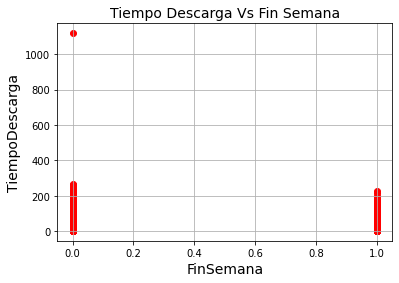

In [119]:
#Checando la linealidade entre 
plt.scatter(df2['FinSemana'], df2['TiempoDescarga'], color='red')
plt.title('Tiempo Descarga Vs Fin Semana', fontsize=14)
plt.xlabel('FinSemana', fontsize=14)
plt.ylabel('TiempoDescarga', fontsize=14)
plt.grid(True)
plt.show()

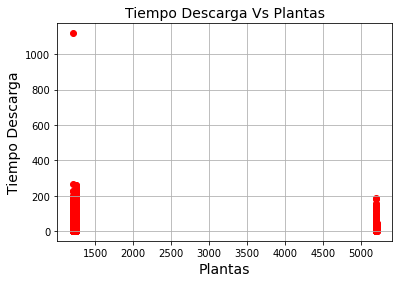

In [121]:
plt.scatter(df2['WERKS'], df2['TiempoDescarga'], color='red')
plt.title('Tiempo Descarga Vs Plantas', fontsize=14)
plt.xlabel('Plantas', fontsize=14)
plt.ylabel('Tiempo Descarga', fontsize=14)
plt.grid(True)
plt.show()